In [ ]:
# import libs 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install torch==1.4.0

     |████████████████████████████████| 753.4MB 23kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


In [ ]:
import torch
from   torch import nn, optim
import torch.nn.functional as F

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
base = pd.read_csv("iris.csv")


In [ ]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


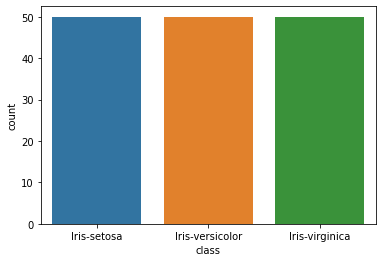

In [ ]:
sns.countplot(base['class']);

In [ ]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [ ]:
previsores.shape

(150, 4)

In [ ]:
classe.shape

(150,)

In [ ]:
np.unique(base['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [ ]:
np.unique(classe)

array([0, 1, 2])

In [ ]:
previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores,
                                                                                classe, 
                                                                                test_size = 0.25)

In [ ]:
print(previsores_train.shape, previsores_test.shape, classe_train.shape, classe_test.shape)


(112, 4) (38, 4) (112,) (38,)


In [ ]:
previsores_train = torch.tensor(previsores_train, dtype=torch.float)
previsores_test = torch.tensor(previsores_test, dtype=torch.float)
classe_train = torch.tensor(classe_train, dtype=torch.long)
classe_test = torch.tensor(classe_test, dtype=torch.long)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
print(type(previsores_train), type(previsores_test), type(classe_train),type(classe_test))


<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


# Construção do modelo

In [ ]:
# 4 neuronios entrada -> 4 -> 4 -> 3 
# (entrada + saida) / 2 = (4 + 3 ) / 2 

In [ ]:
clf = nn.Sequential(
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,3)
)

In [ ]:
criterio = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.001,
                       weight_decay=0.0001)

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_train, classe_train)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

# Treinamendo do Modelo

In [ ]:
for epoch in range(2000):
  running_loss = 0.
  running_acc = 0.

  for data in train_loader:
            inputs, labels = data

            optimizer.zero_grad()

            outputs = clf.forward(inputs)

            loss = criterio(outputs, labels)
            loss.backward()

            outputs = F.softmax(outputs)

            top_p, top_class = outputs.topk(k = 1, dim = 1)

            equals = top_class == labels.view(*top_class.shape)

            running_acc += torch.mean(equals.type(torch.float))

            optimizer.step()

            running_loss += loss.item()

  print("Epoca %3d\t Perde %5f\t acc: %.5f" % (epoch + 1, running_loss / len(train_loader), running_acc / len(train_loader)))     


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Epoca   1	 Perde 1.099499	 acc: 0.35000
Epoca   2	 Perde 1.099430	 acc: 0.35000
Epoca   3	 Perde 1.093608	 acc: 0.38333
Epoca   4	 Perde 1.099367	 acc: 0.35000
Epoca   5	 Perde 1.092882	 acc: 0.38333
Epoca   6	 Perde 1.099367	 acc: 0.35000
Epoca   7	 Perde 1.099268	 acc: 0.35000
Epoca   8	 Perde 1.092909	 acc: 0.38333
Epoca   9	 Perde 1.087154	 acc: 0.41667
Epoca  10	 Perde 1.099264	 acc: 0.35000
Epoca  11	 Perde 1.092759	 acc: 0.38333
Epoca  12	 Perde 1.092608	 acc: 0.38333
Epoca  13	 Perde 1.098112	 acc: 0.35000
Epoca  14	 Perde 1.093797	 acc: 0.38333
Epoca  15	 Perde 1.093713	 acc: 0.38333
Epoca  16	 Perde 1.098249	 acc: 0.35000
Epoca  17	 Perde 1.099198	 acc: 0.35000
Epoca  18	 Perde 1.092511	 acc: 0.38333
Epoca  19	 Perde 1.097696	 acc: 0.35000
Epoca  20	 Perde 1.093919	 acc: 0.38333
Epoca  21	 Perde 1.099031	 acc: 0.35000
Epoca  22	 Perde 1.099052	 acc: 0.35000
Epoca  23	 Perde 1.087398	 acc: 0.41667
Epoca  24	 Perde 1.092376	 acc: 0.38333
Epoca  25	 Perde 1.092321	 acc: 0.38333


# Avaliação do Modelo

In [ ]:
clf.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [ ]:
type(previsores_test)

torch.Tensor

In [ ]:
result = clf(previsores_test)

In [ ]:
F.softmax(result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.3063, 0.3743, 0.3194],
        [0.306

In [ ]:
result = [np.argmax(t) for t in result.detach().numpy()]

In [ ]:
result

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
matriz = confusion_matrix(result, classe_test)

In [ ]:
matriz 

array([[ 0,  0,  0],
       [16,  8, 14],
       [ 0,  0,  0]])

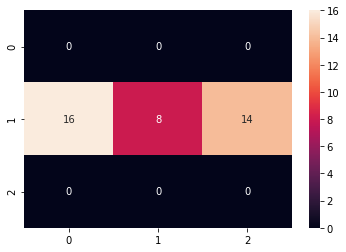

In [ ]:
sns.heatmap(matriz, annot=True);

In [ ]:
## Cross Validation 